In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("telemetry_qavi.csv")

In [3]:
df.head()

,1,A1,A1.1,A1.2,A1.3,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,2,A2,A2,A2,A2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,A1,A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,A2,A2,A1,A1,A1,A1,A3,A1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,A1,A1,A1,A1,A1,A1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,A4,A1,A1,A2,A1,A4,A5,A6,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.set_index(df.columns[0],inplace=True)


In [5]:
df.head()

,A1,A1.1,A1.2,A1.3,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1,,,,,,,,,,,,,,,,,,,,,
2,A2,A2,A2,A2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A1,A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A2,A2,A1,A1,A1,A1,A3,A1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A1,A1,A1,A1,A1,A1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A4,A1,A1,A2,A1,A4,A5,A6,A5,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data=[]
for i in range(100):
    x=df.values[i]
    x=x[~pd.isnull(x)]
    data.append(x)
data

[array(['A2', 'A2', 'A2', 'A2'], dtype=object),
 array(['A1', 'A1'], dtype=object),
 array(['A2', 'A2', 'A1', 'A1', 'A1', 'A1', 'A3', 'A1'], dtype=object),
 array(['A1', 'A1', 'A1', 'A1', 'A1', 'A1'], dtype=object),
 array(['A4', 'A1', 'A1', 'A2', 'A1', 'A4', 'A5', 'A6', 'A5', 'A4', 'A1',
        'A1'], dtype=object),
 array(['A1', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A11', 'A4', 'A13',
        'A7', 'A1', 'A1'], dtype=object),
 array(['A1', 'A1', 'A1'], dtype=object),
 array(['A1', 'A1', 'A5', 'A1'], dtype=object),
 array(['A1', 'A1'], dtype=object),
 array(['A1', 'A1'], dtype=object),
 array(['A1'], dtype=object),
 array(['A1', 'A1'], dtype=object),
 array(['A14', 'A15', 'A16', 'A16', 'A1', 'A1', 'A1'], dtype=object),
 array(['A1', 'A17', 'A18', 'A13', 'A5', 'A1'], dtype=object),
 array(['A19', 'A1'], dtype=object),
 array(['A1'], dtype=object),
 array(['A1'], dtype=object),
 array(['A5', 'A1'], dtype=object),
 array(['A1'], dtype=object),
 array(['A4', 'A1'], dtype=object),
 arra

In [7]:
from markovclick.models import MarkovClickstream
m = MarkovClickstream(data)

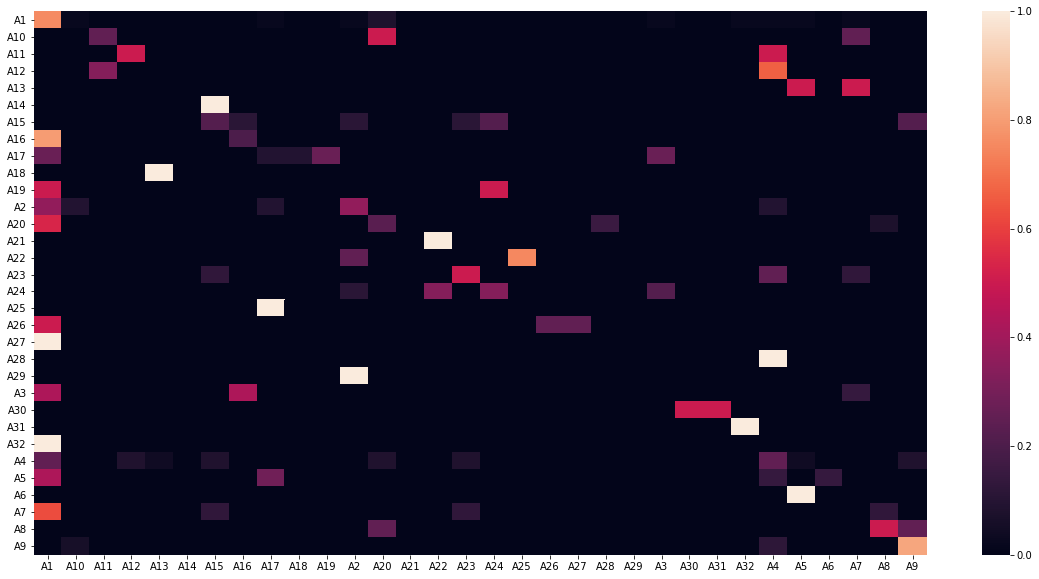

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(m.prob_matrix, xticklabels=m.pages, yticklabels=m.pages)

In [9]:
from markovclick.viz import visualise_markov_chain
graph = visualise_markov_chain(m)

In [10]:
print(graph.source)

digraph {
	A1 [label=A1 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A1 -> A1 [label=0.76 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A1 -> A20 [label="   0.08" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A10 [label=A10 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A10 -> A20 [label=0.50 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A10 -> A7 [label="   0.25" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A10 -> A10 [label="   0.00" arrowsize=0.5 color="#cfd8dc" fontname=Helvetica fontsize=10 penwidth=1.8]
	A11 [label=A11 fillcolor="#76ff03" fontcolor="#1a237e" fontname=Helvetica penwidth=0 style=filled]
	A11 -> A12 [label=0.50 arrowsize=0.75 color="#90caf9" fontname=Helvetica penwidth=1.5]
	A11 -> A4 [label="   0.50" arrowsize=0.5 color="#90caf9" fontname=Helvetica fontsize=10 penwidth=0.75]
	A11 -> A11 [l

In [11]:
graph.render('test-output/round-tabl.gv', view=True)

'test-output\\round-tabl.gv.pdf'

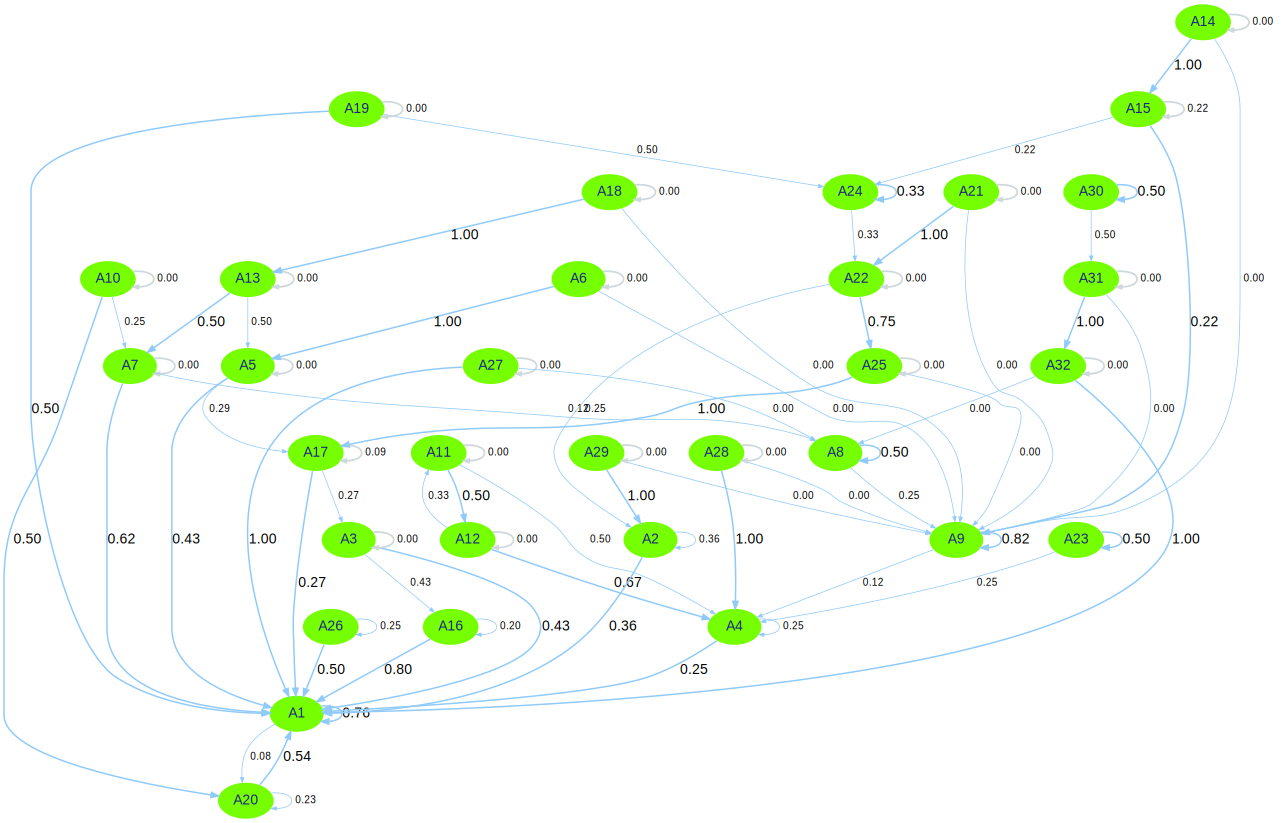

In [12]:
graph